### Customer Churn Prediction

### Project Overview:
This project aims to develop a predictive model that can effectively identify customers who are likely to exit a multinational bank operating in France, Spain, and Germany. Customer churn, the act of customers leaving the bank, is a critical concern for financial institutions. Understanding and predicting churn can help the bank take proactive measures to retain valuable customers, thereby reducing revenue loss and maintaining a competitive edge in the market.

##### Data Description:
The dataset contains the following columns:

RowNumber: A unique identifier for each row.

CustomerId: A unique identifier for each customer.

Surname: The surname of the customer.

CreditScore: The credit score of the customer.

Geography: The country in which the customer resides (France, Spain, or Germany).

Gender: The gender of the customer (Male or Female).

Age: The age of the customer.

Tenure: The number of years the customer has been with the bank.

Balance: The account balance of the customer.

NumOfProducts: The number of bank products the customer uses.

HasCrCard: Whether the customer has a credit card (1 for yes, 0 for no).

IsActiveMember: Whether the customer is an active member (1 for yes, 0 for no).

EstimatedSalary: The estimated salary of the customer.

Exited: The target variable, indicating whether the customer has exited the bank (1 for yes, 0 for no).mm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing the dataset

df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# From above, it can be seen tat there are no missing value in the dataset

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Lets check if there is any duplicated row

df.duplicated().sum()

0

In [9]:
# from above, it can be seen that there are no duplicate rows

In [10]:
# lets check the distribution of the output column. i.e how many customers has exited the bank and how many are still continuing their services with the bank

In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited'>

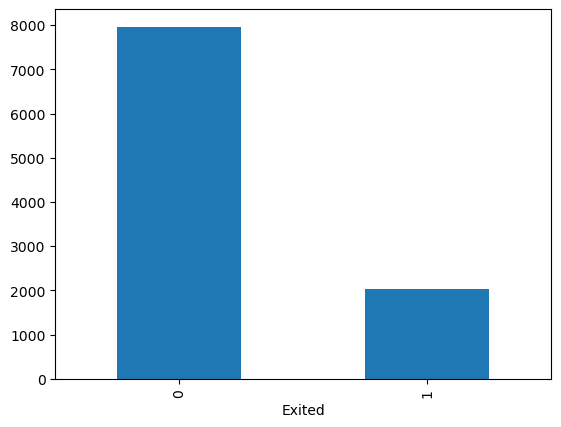

In [12]:
# lets plot it 
df['Exited'].value_counts().plot(kind='bar')

In [13]:
# From the above, it can be clearly seen that this dataset is highly imbalanced. So, lets balance it using SMOTE.
# I shall do it in later stage

In [14]:
# Lets check the distribution of Geography and Gender also

df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='Geography'>

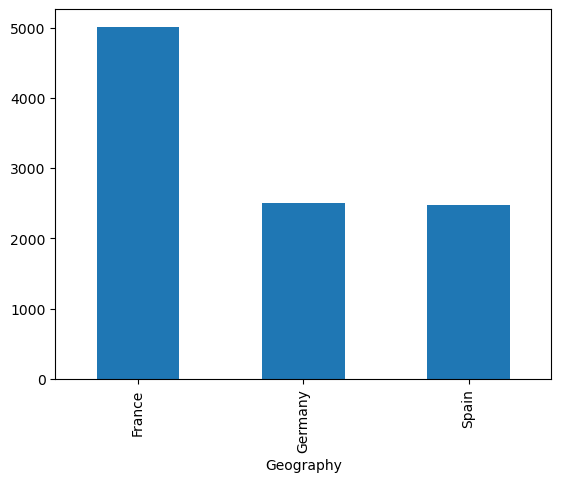

In [15]:
df['Geography'].value_counts().plot(kind='bar')

In [16]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

<Axes: xlabel='Gender'>

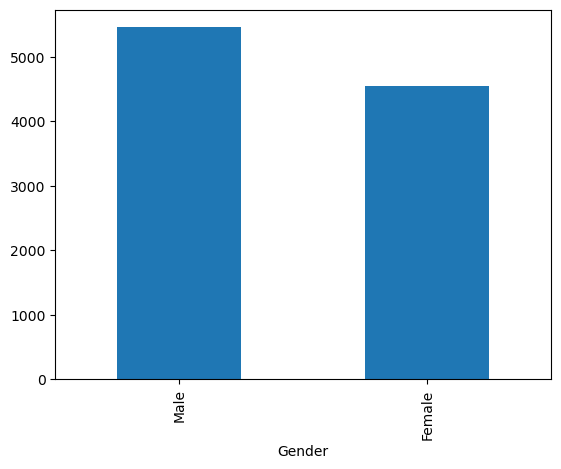

In [17]:
df['Gender'].value_counts().plot(kind='bar')

In [18]:
# Gender distribution is more or less equal

In [19]:
# now lets take only the required column 

df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
# Lets convert the categorical column to numerical

df['Geography']=pd.factorize(df['Geography'])[0]

In [22]:
df['Gender']=pd.factorize(df['Gender'])[0]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [24]:
df.shape

(10000, 11)

In [25]:
X=df.iloc[:, 0:-1]
y=df.iloc[:, -1]

In [26]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,2,1,42,3,75075.31,2,1,0,92888.52


In [27]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [28]:
# Now lets balance the dataset using SMOTE

In [29]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote=SMOTE()

In [32]:
X_resampled,y_resampled=smote.fit_resample(X,y)

<Axes: xlabel='Exited'>

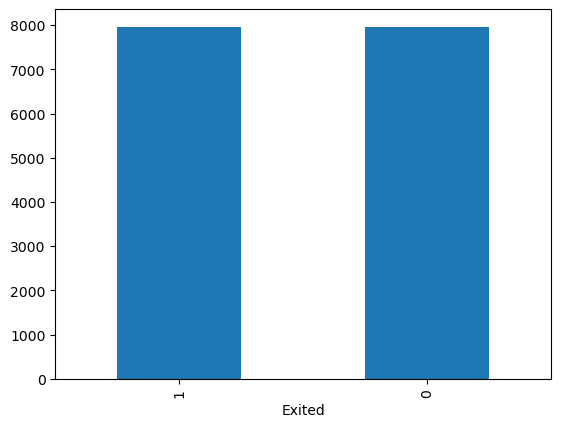

In [33]:
y_resampled.value_counts().plot(kind='bar')

In [34]:
# I have resamled and balanced the dataset.

In [35]:
# Lets split the data for training and building model using ANN

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=1)

In [38]:
print(X_resampled_train.shape, y_resampled_train.shape)
print(X_resampled_test.shape, y_resampled_test.shape)

(12740, 10) (12740,)
(3186, 10) (3186,)


In [39]:
# Since it is recommended to scale the values before building model using ANN (since if values are very far apart, the weights will not get converged easily)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
X_resampled_train_scaled=scaler.fit_transform(X_resampled_train)

In [43]:
X_resampled_test_scaled=scaler.fit_transform(X_resampled_test)

In [44]:
X_resampled_train_scaled

array([[ 0.42634373,  0.29910675,  1.18213397, ...,  0.77531022,
         1.29131878, -0.43543378],
       [-1.90653899,  1.50309413, -0.84592781, ...,  0.77531022,
         1.29131878, -0.48985641],
       [ 0.76587126,  0.29910675,  1.18213397, ..., -1.28980628,
        -0.77440212,  1.2810106 ],
       ...,
       [-0.9427189 ,  0.29910675, -0.84592781, ...,  0.77531022,
        -0.77440212, -1.69883633],
       [ 1.26968631,  1.50309413,  1.18213397, ...,  0.77531022,
        -0.77440212, -1.17654606],
       [-2.20225652, -0.90488062, -0.84592781, ..., -1.28980628,
        -0.77440212, -0.59508289]])

In [45]:
# pip install tensorflow

In [46]:
import tensorflow

In [47]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [48]:
model=Sequential()

model.add(Dense(12,input_dim=10,activation='relu'))      # 1st Hidden layer    
model.add(Dense(10,activation='relu'))                    # 2nd Hidden layer
model.add(Dense(1, activation='sigmoid'))                  # Output layer

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# From above it can be seen that there are total 273 parameters which consist of weights and biases.
# So, when the Neural network model is trained, it will find the values of all 273 parameters for further prediction.

In [51]:
# Now lets compile the model

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [52]:
history=model.fit(X_resampled_train_scaled,y_resampled_train,epochs=150, validation_split=0.2)    
# The validation_split=0.2 splitted the data where 80% is the training data and 20% is the testing data. Here the model will train and give accuracy on test data simultaneously.
# This is the stage where my neural network is getting trained
# I have stored this entire data in a dictionary named "history". Now I can plot a graph at any stage I want.

Epoch 1/150


319/319 [==============================] - 1s 1ms/step - loss: 0.5912 - accuracy: 0.6912 - val_loss: 0.5052 - val_accuracy: 0.7543
Epoch 2/150
319/319 [==============================] - 0s 929us/step - loss: 0.4759 - accuracy: 0.7699 - val_loss: 0.4695 - val_accuracy: 0.7798
Epoch 3/150
319/319 [==============================] - 0s 913us/step - loss: 0.4504 - accuracy: 0.7870 - val_loss: 0.4470 - val_accuracy: 0.7889
Epoch 4/150
319/319 [==============================] - 0s 941us/step - loss: 0.4361 - accuracy: 0.7956 - val_loss: 0.4346 - val_accuracy: 0.7979
Epoch 5/150
319/319 [==============================] - 0s 935us/step - loss: 0.4270 - accuracy: 0.8009 - val_loss: 0.4257 - val_accuracy: 0.8006
Epoch 6/150
319/319 [==============================] - 0s 896us/step - loss: 0.4192 - accuracy: 0.8061 - val_loss: 0.4159 - val_accuracy: 0.8034
Epoch 7/150
319/319 [==============================] - 0s 895us/step - loss: 0.4129 - accuracy: 0.8082 - val_loss: 0.4128 - val_ac

319/319 [==============================] - 0s 946us/step - loss: 0.3673 - accuracy: 0.8354 - val_loss: 0.3835 - val_accuracy: 0.8246
Epoch 55/150
319/319 [==============================] - 0s 875us/step - loss: 0.3674 - accuracy: 0.8359 - val_loss: 0.3829 - val_accuracy: 0.8269
Epoch 56/150
319/319 [==============================] - 0s 882us/step - loss: 0.3667 - accuracy: 0.8372 - val_loss: 0.3862 - val_accuracy: 0.8242
Epoch 57/150
319/319 [==============================] - 0s 872us/step - loss: 0.3667 - accuracy: 0.8367 - val_loss: 0.3827 - val_accuracy: 0.8254
Epoch 58/150
319/319 [==============================] - 0s 868us/step - loss: 0.3665 - accuracy: 0.8377 - val_loss: 0.3827 - val_accuracy: 0.8269
Epoch 59/150
319/319 [==============================] - 0s 864us/step - loss: 0.3669 - accuracy: 0.8352 - val_loss: 0.3824 - val_accuracy: 0.8254
Epoch 60/150
319/319 [==============================] - 0s 875us/step - loss: 0.3664 - accuracy: 0.8363 - val_loss: 0.3816 - val_accuracy

Epoch 111/150
319/319 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8368 - val_loss: 0.3821 - val_accuracy: 0.8238
Epoch 112/150
319/319 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8387 - val_loss: 0.3839 - val_accuracy: 0.8218
Epoch 113/150
319/319 [==============================] - 0s 954us/step - loss: 0.3612 - accuracy: 0.8401 - val_loss: 0.3826 - val_accuracy: 0.8226
Epoch 114/150
319/319 [==============================] - 0s 924us/step - loss: 0.3621 - accuracy: 0.8369 - val_loss: 0.3845 - val_accuracy: 0.8250
Epoch 115/150
319/319 [==============================] - 0s 895us/step - loss: 0.3612 - accuracy: 0.8384 - val_loss: 0.3835 - val_accuracy: 0.8218
Epoch 116/150
319/319 [==============================] - 0s 918us/step - loss: 0.3615 - accuracy: 0.8390 - val_loss: 0.3827 - val_accuracy: 0.8226
Epoch 117/150
319/319 [==============================] - 0s 928us/step - loss: 0.3620 - accuracy: 0.8380 - val_loss: 0.383

In [53]:
# Now the model has been trained and the model has calculated all the weights and biases.
# Lets check the weights assigned to the inputs

weights=model.layers[0].get_weights()  # This will show all the 120 weights and 12 biases

In [54]:
# Similarly lets check the weights for next layer

model.layers[1].get_weights()

[array([[ 0.08024152,  0.49455115,  0.4761723 , -0.39552483,  0.32363397,
         -0.22575088,  0.7067389 , -0.14569339,  0.18204093,  0.259223  ],
        [-0.23446292,  0.38861704,  0.7486749 ,  0.04477453, -0.08799285,
         -0.30785888, -0.06701332, -0.7378529 ,  0.34224373, -0.025589  ],
        [-0.17549808,  0.11509491,  0.12317255, -0.15489155,  0.5866182 ,
          0.35012004, -0.10069875,  0.7672664 ,  0.7430648 , -0.23917206],
        [ 0.72607917, -0.14268897,  0.3626821 ,  0.2136246 , -0.02801708,
          0.4787131 , -0.19759889,  0.02804545,  0.4155495 ,  0.13052389],
        [-0.4730712 ,  0.9137532 , -1.0493113 ,  0.1653496 , -1.0677656 ,
          0.8807102 ,  0.32579827, -2.816435  , -1.0659124 ,  0.27728468],
        [ 0.751313  ,  0.15330441,  0.17210616, -0.49836174,  0.33542657,
         -0.41202325,  0.21590936, -1.7432821 ,  0.2607797 , -1.2283581 ],
        [ 0.920128  ,  0.15440935, -0.70965004, -0.672412  , -1.2638798 ,
         -0.19977903,  0.4740461

In [55]:
y_log=model.predict(X_resampled_test_scaled)
y_log

100/100 [==============================] - 0s 595us/step


array([[0.19250011],
       [0.4433936 ],
       [0.85882103],
       ...,
       [0.9692943 ],
       [0.13356255],
       [0.3872059 ]], dtype=float32)

In [56]:
# Since the output is not in the form of 0 & 1. so lets convert it using a threshold of 0.5

In [57]:
y_pred=np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
print("Accuracy of the model is : ", accuracy_score(y_resampled_test,y_pred))

Accuracy of the model is :  0.8298807281858129


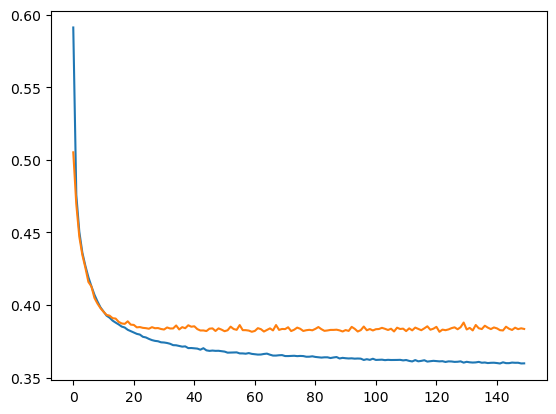

In [60]:
plt.plot(history.history['loss'])    # History is a dictionary that stores loss, accuracy, validation_loss, validation_accuracy in key value pair
plt.plot(history.history['val_loss'])

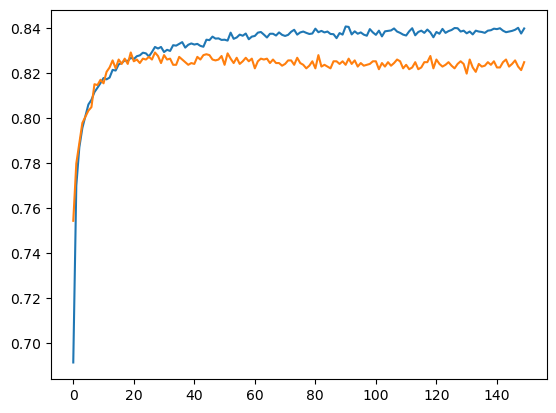

In [61]:
plt.plot(history.history['accuracy'])    
plt.plot(history.history['val_accuracy'])

In [62]:
#Since the loss and accuracy curves are more or less close to val_loss and val_accuray curve, so it can be inferrred that the model has not overfitted the training data

In [63]:
# Predicting on new data
X                       

# Geography: 0-France, 1-Spain, 2-Germany
# Gender: 0-Female, 1-Male

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,2,1,42,3,75075.31,2,1,0,92888.52


In [64]:
input_data=(650,1,0,50,2,55000,1,1,0,100000)

# changing input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# Reshaping the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

1/1 [==============================] - 0s 39ms/step
[[0.]]


In [65]:
input_data=(500,1,1,30,2,500,1,1,0,50000)

# changing input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# Reshaping the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

1/1 [==============================] - 0s 4ms/step
[[0.]]


In [66]:
# Lets save the model
model.save("churn_prediction_model.h5")

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
